# <span style = "color:coral">Cyber Bullying Classification</span>

***

Cyberbullying is bullying with the use of digital technologies. It can take place on social media, messaging platforms, gaming platforms and mobile phones. It is repeated behaviour, aimed at scaring, angering or shaming those who are targeted.

Face-to-face bullying and cyberbullying can often happen alongside each other. But cyberbullying leaves a digital footprint – a record that can prove useful and provide evidence to help stop the abuse.

***

### Import necessary Libraries

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Find the dataset <a href = "https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification">here </a>

### Read 'cyberbullying_tweets.csv'

In [58]:
df = pd.read_csv('cyberbullying_tweets.csv')

In [59]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


### Check info of the dataset

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


### Shufle the dataset and reset the index(also drop the old index)

In [62]:
df = df.sample(frac=1)

In [63]:
df.reset_index(inplace = True,drop=True)

In [64]:
df = df[0:1000]

### Check the unique values in 'cyberbullying_type'

In [72]:
df['cyberbullying_type'].unique()

array(['ethnicity', 'not_cyberbullying', 'age', 'religion',
       'other_cyberbullying', 'gender'], dtype=object)

### Print few of the texts in 'tweet_text'

In [66]:
for i in range(10):
    print(df['tweet_text'][i],'------',df['cyberbullying_type'][i])
    print()

Y’all see all these niggers trying to justify celebrating a WHITE holiday to me like I’m somebody y’all ancestors were in chains July 4th, 1776 but y’all keep on. I DONT GIVE A FUCK WHAT YOU DO WITH YOUR TIME dumb asses..pop all the fireworks and eat all the bbq clowns ------ ethnicity

@Spacekatgal @danielpunkass hehehe. "at this level" ------ not_cyberbullying

anyways, fuck secondary school, especially my first 2 years were fucking hell. and my classmates, at least 60% of them were some of the most trashy people ever, unsympathetic, 0 empathy, borderline bullies. gross as FUCKKKK ------ age

Ok from your response I gather you see things as non systemic. That killer cop wasn't just a lone actor, he was a part of a system. The Muslims you claim had 600 (questionable buy ill let it pass) killings are political terrorists. People don't self radicalize. They are pushed ------ religion

Pop quiz for the brainwashed kaum, Name 5 hindu celebrities from Pakistan, and name 5 muslim celebritie

### Check basic statistical information about the dataset with .describe method

In [73]:
df.describe()

,tweet_text,cyberbullying_type
count,1000,1000
unique,999,6
top,An old friend just posted this on Facebook :P ...,not_cyberbullying
freq,2,177


### Check for any missing values

In [74]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

### Check for any duplicated values (Drop duplicates if any)

In [75]:
df.duplicated().sum()

0

In [76]:
df.drop_duplicates(inplace = True)

### Plot the countplot of 'Cyberbullying_type'

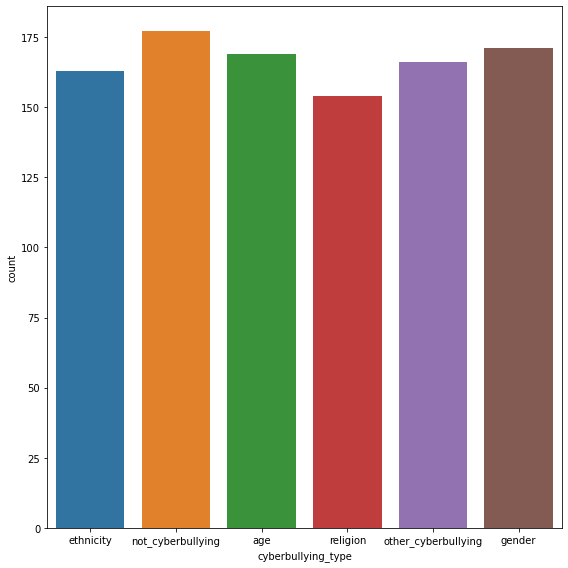

In [77]:
plt.figure(figsize = (8,8))
sns.countplot(x = df['cyberbullying_type'])
plt.tight_layout()

### Create a Function that does the following operations
* Remove any special characters or symbols
* Convert all text to lowercase
* Remove any stopwords
* Lemmatise all the words present in the text

In [79]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]", ' ', sentence).split()
    
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words]
    
    word = ' '.join(word)
    return word

### Apply the function you just created to 'tweet_text'

In [80]:
df['tweet_text'] = df['tweet_text'].apply(preprocess)

### Print some of the text after applying the function

In [82]:
for i in range(5):
    print(df['tweet_text'][i],'-----',df['cyberbullying_type'][i])
    print()

y see niggers try justify celebrate white holiday like i somebody ancestors chain july 4th 1776 keep i dont give a fuck what you do with your time dumb asses pop fireworks eat bbq clown ----- ethnicity

spacekatgal danielpunkass hehehe level ----- not_cyberbullying

anyways fuck secondary school especially first 2 years fuck hell classmates least 60 trashy people ever unsympathetic 0 empathy borderline bully gross fuckkkk ----- age

ok response i gather see things non systemic that killer cop lone actor part system the muslims claim 600 questionable buy ill let pass kill political terrorists people self radicalize they push ----- religion

pop quiz brainwash kaum name 5 hindu celebrities pakistan name 5 muslim celebrities india you raise believe lie hard accept how many hindu boys go school what hindu pak don idiot forever ----- religion



### Create a Function to convert the categorical values into numerical. Use the following order:
* not_cyberbullying = 0
* ethnicity = 1
* age = 2
* religion = 3
* gender = 4
* other_cyberbullying = 5

In [85]:
def change_type(a):
    if a == 'ethnicity':
        return 1
    elif a == 'not_cyberbullying':
        return 0
    elif a == 'age':
        return 2
    elif a == 'religion':
        return 3
    elif a == 'gender':
        return 4
    else:
        return 5

### Apply the funtion to 'cyberbullying_type' column

In [88]:
df['cyberbullying_type'] = df['cyberbullying_type'].apply(change_type)

In [89]:
df.head()

,tweet_text,cyberbullying_type
0,y see niggers try justify celebrate white holi...,1
1,spacekatgal danielpunkass hehehe level,0
2,anyways fuck secondary school especially first...,2
3,ok response i gather see things non systemic t...,3
4,pop quiz brainwash kaum name 5 hindu celebriti...,3


### Split the dataset into input(X) and Target (y) variables

In [90]:
X = df['tweet_text']
y = df['cyberbullying_type']

### OneHotEncode our Target Variable with LabelBinalizer

In [93]:
lb = LabelBinarizer()

In [95]:
y = lb.fit_transform(y)

### Split the dataset into Training and Testing set

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

### Convert text to sequence and add padding

In [100]:
tokenizer = Tokenizer(num_words=5000)

In [102]:
tokenizer.fit_on_texts(X)

In [103]:
vocab_size = len(tokenizer.word_index) + 1

In [105]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)    
       
    return padded_sequence

In [106]:
X_train = text_encoding(X_train)
X_test = text_encoding(X_test)

### Create a keras Sequential model with the following layers
* Embedding layer
* 2 GRU layers
* Dropout layers
* 1 Hidden layer
* Output layer

In [139]:
model = Sequential()
model.add(layers.Embedding(vocab_size, 128))

model.add(layers.GRU(128, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.GRU(128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(6, activation = 'softmax'))

### Compile the model

In [140]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

### Check the summary of the model

In [164]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 128)         575744    
                                                                 
 gru_8 (GRU)                 (None, None, 128)         99072     
                                                                 
 dropout_11 (Dropout)        (None, None, 128)         0         
                                                                 
 gru_9 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)               

### Train the model with X_train & y_train

In [143]:
model.fit(X_train, y_train, epochs=15, validation_split=0.1)

Epoch 1/15
23/23 [==============================] - 3s 127ms/step - loss: 0.0736 - accuracy: 0.9806 - val_loss: 1.0755 - val_accuracy: 0.7000
Epoch 2/15
23/23 [==============================] - 3s 123ms/step - loss: 0.0358 - accuracy: 0.9931 - val_loss: 1.3280 - val_accuracy: 0.7000
Epoch 3/15
23/23 [==============================] - 3s 123ms/step - loss: 0.0341 - accuracy: 0.9861 - val_loss: 1.2828 - val_accuracy: 0.6875
Epoch 4/15
23/23 [==============================] - 3s 123ms/step - loss: 0.0117 - accuracy: 0.9986 - val_loss: 1.2882 - val_accuracy: 0.7250
Epoch 5/15
23/23 [==============================] - 3s 124ms/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 1.4311 - val_accuracy: 0.7000
Epoch 6/15
23/23 [==============================] - 3s 125ms/step - loss: 0.0378 - accuracy: 0.9903 - val_loss: 1.3861 - val_accuracy: 0.7000
Epoch 7/15
23/23 [==============================] - 3s 124ms/step - loss: 0.0229 - accuracy: 0.9944 - val_loss: 1.4701 - val_accuracy: 0.6750
Epoch 

### Evaluate the model with model.evaluate method

In [144]:
model.evaluate(X_train, y_train)

25/25 [==============================] - 2s 37ms/step - loss: 0.1660 - accuracy: 0.9700


[0.1660234034061432, 0.9700000286102295]

### Make predictions with X_test

In [145]:
y_pred = model.predict(X_test)

### Convert all predicted values and Actual values to a simple array (Remove OneHotEncoding)

In [150]:
y_pred = [np.argmax(i) for i in y_pred]
y_test = [np.argmax(i) for i in y_test]

### Check the accuracy score of our prediction

In [153]:
accuracy_score(y_test, y_pred)

0.655

### Plot confusion matrix on a heatmap

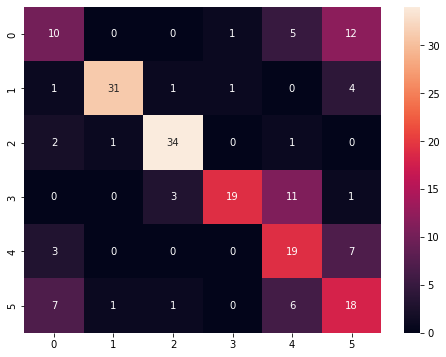

In [166]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

### Print classification report

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.36      0.39        28
           1       0.94      0.82      0.87        38
           2       0.87      0.89      0.88        38
           3       0.90      0.56      0.69        34
           4       0.45      0.66      0.54        29
           5       0.43      0.55      0.48        33

    accuracy                           0.66       200
   macro avg       0.67      0.64      0.64       200
weighted avg       0.70      0.66      0.66       200



***